In [1]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
boston = load_boston()

In [2]:
X = boston.data
Y = boston.target

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


## Train out Linear Regression Model

In [5]:
# 1. Create an object
lr = LinearRegression(normalize=True)
print(lr)

# 2. Training
lr.fit(X_train,Y_train)

# 3. Output Parameters
print(lr.coef_)
print(lr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
[-1.04141719e-01  4.05850108e-02  2.56920744e-02  3.78403460e+00
 -1.83907351e+01  4.45385733e+00 -3.86325373e-03 -1.59233010e+00
  2.59621388e-01 -8.66076684e-03 -9.29443681e-01  1.00953674e-02
 -5.45545170e-01]
32.0351491055958


In [6]:
lr.predict(X_test)

array([21.7105939 , 18.50850779, 15.78139076, 18.15566819, 40.8509962 ,
       34.58008046, 29.86603856, 19.56871691, 18.06087451, 27.97610549,
       37.03930369, 14.73486669, 23.97546149, 20.0729992 , 16.93793619,
       33.17585369, 27.18788667, 23.57757743, 16.30503065, 20.04696691,
       33.97508015, 12.05610066, 32.81618042,  9.06249832, 22.54810591,
       19.0529579 , 30.58271911, 22.6746652 ,  8.12822522, 30.21533443,
       23.7495596 , 19.50783447, 32.37059786, 25.00317276, 22.41742389,
        7.60089169, 13.15765618, 41.86670906, 31.85752191, 21.41797806,
        3.41187155, 12.93144678, 33.41100636,  7.71953098, 35.39047699,
       22.9958245 , 34.24446328, 20.86821413, 17.43272869, 19.05022433,
       22.89200086, 24.01872716, 22.80382011, 22.59767144, 17.2398563 ,
       23.58059541, 27.46515955, 35.05833178, 13.53468857, 20.75762816,
        5.69966614, 24.10855514, 25.48696803, 18.88585596, 18.24027242,
       16.26098698, 20.54002111, 36.78647709, 34.5599951 , 23.13

## Accuracy of Regression

In [7]:
print("Training Score %.4f"%lr.score(X_train,Y_train))
print("Testing Score %.4f"%lr.score(X_test,Y_test))

Training Score 0.7462
Testing Score 0.6808


#### This score is coefficient of Determination
R^2 = 1-((yA-yP)^2)/((yA-(mean of yA))^2)

- Best Case = 1

## Doing From Scratch

In [8]:
def hypothesis(x,theta):
    return np.dot(x,theta.T)

def error(X,Y,theta):
    m = Y.shape[0]
    err = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        err += (hx-Y[i])**2
        
    return err/2

def predict(y_pred,y_act):
    counter=0
    for i in range(y_act.shape[0]):
        if(y_pred[i]==Y_test[i]):
            counter+=1
    accuracy = (counter/y_act.shape[0])*100
    
    return accuracy

### Gradient Descent using Batch Gradient (Taking the whole dataset)

In [9]:
def batch_gradient(X,Y,theta):
    m = Y.shape[0]
    grad = np.zeros((X.shape[1],1))
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            grad[j] += ((Y[i] - hx)*X[i][j])
            
    return grad*0.5

def batch_gradientDescent(X,Y,learning_rate=0.000000001):
    theta = np.zeros((X.shape[1],))
    
    e = error(X,Y,theta)
    de = e
    error_list = [e]
    itr = 0
    
    while(itr<=100):
        grad = batch_gradient(X,Y,theta)
        for j in range(X.shape[1]):
            theta[j] = theta[j] + learning_rate*grad[j]
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne - e
        e = ne
        itr += 1
        
    return theta,error_list

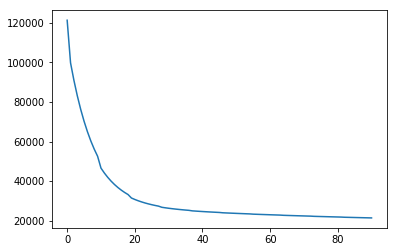

In [10]:
final_theta_1,error_list_1 = batch_gradientDescent(X_train,Y_train)
plt.plot(error_list_1)
plt.show()

In [23]:
y_pred_1 = hypothesis(X_test,final_theta_1)
print(y_pred_1)
print(Y_test)

[27.25405062 27.39133232 16.83093757 27.75461938 26.09606759 20.95821331
 21.12387765 19.46539683 25.18215637 19.74893134 19.83787106 13.66555672
 23.32966697 23.48002828 21.67265789 21.10615389 20.75045875 20.56141538
 27.75726567 23.58412493 22.62445517 14.2676573  22.15374295 26.58743689
 20.49133974 27.73441    22.42388362 22.5770049  14.87282228 20.90137403
 22.26865893 21.16030137 20.13440584 20.27521131 27.20843867 19.83405752
 26.11854128 18.62251968 20.67940163 26.06251349 23.59443865 27.75350707
 19.98518958 22.95107089 19.30428137 20.48714835 20.71833984 21.23825595
 20.11041262 27.77273133 20.449859   18.50965013 20.27043575 20.33367797
 27.67290794 20.03925889 19.75958252 20.23085204 24.63518203 23.51866045
 26.86276774 20.36373873 20.6123438  20.5150582  27.77702367 19.69356585
 22.4743961  19.94417001 19.98456081 21.08887231 19.92579494 18.84958936
 23.47492742 18.97861134 17.58734518 21.26852006 25.13302465 19.84379357
 19.00785699 21.88190185 22.3230494  27.00162243 21

In [24]:
r2_score(Y_test,y_pred_1)

-0.4129883983432747

### Gradient Descent using Stochastic Gradient (Taking only one training example at a time)

In [227]:
def stochastic_gradient(X,Y,theta,batch_size=1):
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((X.shape[1],1))
    
    for i in indices:
        hx = hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            grad[j] += ((Y[i] - hx)*X[i][j])
            
    return grad*0.5

def stochastic_gradientDescent(X,Y,learning_rate=0.000000000001):
    theta = np.zeros((X.shape[1],))
    
    e = error(X,Y,theta)
    de = e
    error_list = [e]
    itr = 0
    
    while(itr<=100):
        grad = stochastic_gradient(X,Y,theta)
        for j in range(X.shape[1]):
            theta[j] = theta[j] + learning_rate*grad[j]
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne - e
        e = ne
        itr += 1
        
    return theta,error_list

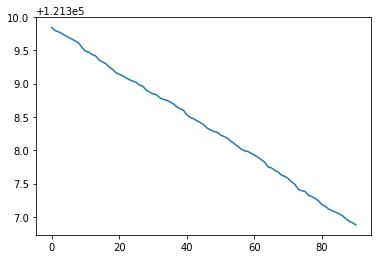

In [228]:
final_theta_2,error_list_2 = stochastic_gradientDescent(X_train,Y_train)
plt.plot(error_list_2)
plt.show()

In [229]:
y_pred_2 = hypothesis(X_test,final_theta_2)

In [230]:
r2_score(Y_test,y_pred_2)

-7.281564393519341

### Gradient Descent using Mini-Batch Gradient (Taking the subsets of the training examples)

In [339]:
def mini_batch_gradient(X,Y,theta,batch_size=32):
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((X.shape[1],1))
    
    for i in indices:
        hx = hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            grad[j] += ((Y[i] - hx)*X[i][j])
            
    return grad*0.5

def mini_batch_gradientDescent(X,Y,learning_rate=0.0000001):
    theta = np.zeros((X.shape[1],))
    
    e = error(X,Y,theta)
    de = e
    error_list = [e]
    itr = 0
    
    while(itr<=100):
        grad = mini_batch_gradient(X,Y,theta)
        for j in range(X.shape[1]):
            theta[j] = theta[j] + learning_rate*grad[j]
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne - e
        e = ne
        itr += 1
        
    return theta,error_list

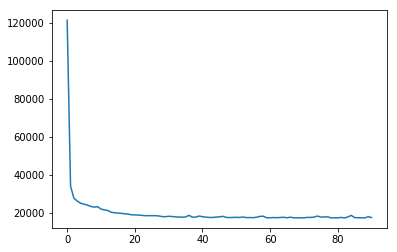

In [340]:
final_theta_3,error_list_3 = mini_batch_gradientDescent(X_train,Y_train)
plt.plot(error_list_3)
plt.show()

In [341]:
y_pred_3 = hypothesis(X_test,final_theta_3)

In [342]:
r2_score(Y_test,y_pred_3)

0.11159496151372406